# Exploring Data with Python

Below is an example of various data exploration methods performed on the grades.csv file which can be found on this link: https://mybinder.org/v2/gh/guypwhunt/data_analysis_and_machine_learning/HEAD?filepath=data%2Fgrades.csv

In [43]:
# Import the neccessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import ipywidgets as widgets
import time

## 1. The data from the CSV is imported into a dataframe. The dataframe can be seen below

In [3]:
df_students = pd.read_csv('data/grades.csv',delimiter=',',header='infer')
print(df_students)

         Name  StudyHours  Grade
0         Dan       10.00   50.0
1       Joann       11.50   50.0
2       Pedro        9.00   47.0
3       Rosie       16.00   97.0
4       Ethan        9.25   49.0
5       Vicky        1.00    3.0
6    Frederic       11.50   53.0
7      Jimmie        9.00   42.0
8      Rhonda        8.50   26.0
9    Giovanni       14.50   74.0
10  Francesca       15.50   82.0
11      Rajab       13.75   62.0
12    Naiyana        9.00   37.0
13       Kian        8.00   15.0
14      Jenny       15.50   70.0
15     Jakeem        8.00   27.0
16     Helena        9.00   36.0
17      Ismat        6.00   35.0
18      Anila       10.00   48.0
19       Skye       12.00   52.0
20     Daniel       12.50   63.0
21      Aisha       12.00   64.0
22       Bill        8.00    NaN
23        Ted         NaN    NaN


## 2. The dataframe has the following shape

In [4]:
rows = df_students.shape[0]
columns = df_students.shape[1]

print(f'The dataframe has {rows} number of rows')
print(f'The dataframe has {columns} number of columns')

The dataframe has 24 number of rows
The dataframe has 3 number of columns


## 3. The average values of the student's grades and study hours have been identified

In [5]:
avg_study_hours = df_students.StudyHours.mean()
avg_grade = df_students.Grade.mean()

print(f"The average student's grades are {round(avg_study_hours,2)}")
print(f"The average student's study hours are {round(avg_grade,2)}")

The average student's grades are 10.41
The average student's study hours are 49.18


## 4. The student's with null values in the datagram are identified by a 'TRUE' values in one of the columns

In [6]:
print(df_students.isnull())

     Name  StudyHours  Grade
0   False       False  False
1   False       False  False
2   False       False  False
3   False       False  False
4   False       False  False
5   False       False  False
6   False       False  False
7   False       False  False
8   False       False  False
9   False       False  False
10  False       False  False
11  False       False  False
12  False       False  False
13  False       False  False
14  False       False  False
15  False       False  False
16  False       False  False
17  False       False  False
18  False       False  False
19  False       False  False
20  False       False  False
21  False       False  False
22  False       False   True
23  False        True   True


## 5. The null values per column have been identified

In [7]:
print(df_students.isnull().sum())

Name          0
StudyHours    1
Grade         2
dtype: int64


## 6. The records containing null values have been identified

In [8]:
df_students[df_students.isnull().any(axis=1)]

,Name,StudyHours,Grade
22,Bill,8.0,NaN
23,Ted,NaN,NaN


## 7. The students with null results are dropped from the dataframe as can be seen below

In [9]:
df_students = df_students.dropna(axis=0, how='any')
print(df_students)

         Name  StudyHours  Grade
0         Dan       10.00   50.0
1       Joann       11.50   50.0
2       Pedro        9.00   47.0
3       Rosie       16.00   97.0
4       Ethan        9.25   49.0
5       Vicky        1.00    3.0
6    Frederic       11.50   53.0
7      Jimmie        9.00   42.0
8      Rhonda        8.50   26.0
9    Giovanni       14.50   74.0
10  Francesca       15.50   82.0
11      Rajab       13.75   62.0
12    Naiyana        9.00   37.0
13       Kian        8.00   15.0
14      Jenny       15.50   70.0
15     Jakeem        8.00   27.0
16     Helena        9.00   36.0
17      Ismat        6.00   35.0
18      Anila       10.00   48.0
19       Skye       12.00   52.0
20     Daniel       12.50   63.0
21      Aisha       12.00   64.0


## 8. The students who studied more than the mean have been identified

In [10]:
df_students[df_students.StudyHours > avg_study_hours]

,Name,StudyHours,Grade
1,Joann,11.50,50.0
3,Rosie,16.00,97.0
6,Frederic,11.50,53.0
9,Giovanni,14.50,74.0
10,Francesca,15.50,82.0
11,Rajab,13.75,62.0
14,Jenny,15.50,70.0
19,Skye,12.00,52.0
20,Daniel,12.50,63.0
21,Aisha,12.00,64.0


## 9. The mean grade of the students who studied more that average has been calculated

In [11]:
avg_grade_of_students_who_studied_more_than_average = df_students[df_students.StudyHours > avg_study_hours].Grade.mean()

print(f'The average grade of students who studied more than average is {avg_grade_of_students_who_studied_more_than_average}')

The average grade of students who studied more than average is 66.7


## 10. Assuming the pass mark is 60 we add a new column indicating if the students passed or not

In [12]:
passes  = pd.Series(df_students['Grade'] >= 60)
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)

print(df_students)

         Name  StudyHours  Grade   Pass
0         Dan       10.00   50.0  False
1       Joann       11.50   50.0  False
2       Pedro        9.00   47.0  False
3       Rosie       16.00   97.0   True
4       Ethan        9.25   49.0  False
5       Vicky        1.00    3.0  False
6    Frederic       11.50   53.0  False
7      Jimmie        9.00   42.0  False
8      Rhonda        8.50   26.0  False
9    Giovanni       14.50   74.0   True
10  Francesca       15.50   82.0   True
11      Rajab       13.75   62.0   True
12    Naiyana        9.00   37.0  False
13       Kian        8.00   15.0  False
14      Jenny       15.50   70.0   True
15     Jakeem        8.00   27.0  False
16     Helena        9.00   36.0  False
17      Ismat        6.00   35.0  False
18      Anila       10.00   48.0  False
19       Skye       12.00   52.0  False
20     Daniel       12.50   63.0   True
21      Aisha       12.00   64.0   True


## 11. The dataframe was sorted by if students passed or failed

In [13]:
df_students = df_students.sort_values('Grade', ascending=False)
print(df_students)

         Name  StudyHours  Grade   Pass
3       Rosie       16.00   97.0   True
10  Francesca       15.50   82.0   True
9    Giovanni       14.50   74.0   True
14      Jenny       15.50   70.0   True
21      Aisha       12.00   64.0   True
20     Daniel       12.50   63.0   True
11      Rajab       13.75   62.0   True
6    Frederic       11.50   53.0  False
19       Skye       12.00   52.0  False
1       Joann       11.50   50.0  False
0         Dan       10.00   50.0  False
4       Ethan        9.25   49.0  False
18      Anila       10.00   48.0  False
2       Pedro        9.00   47.0  False
7      Jimmie        9.00   42.0  False
12    Naiyana        9.00   37.0  False
16     Helena        9.00   36.0  False
17      Ismat        6.00   35.0  False
15     Jakeem        8.00   27.0  False
8      Rhonda        8.50   26.0  False
13       Kian        8.00   15.0  False
5       Vicky        1.00    3.0  False


## 12. A Bar Chart and Pie Chart Were Created from the Dataframe

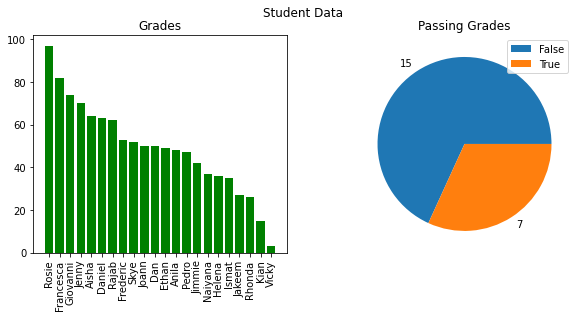

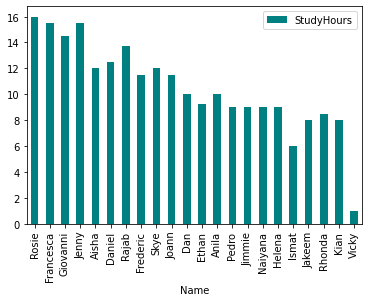

In [14]:
%matplotlib inline

# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot of name vs grade on the first axis
ax[0].bar(x=df_students.Name, height=df_students.Grade, color='green')
ax[0].set_title('Grades')
ax[0].set_xticklabels(df_students.Name, rotation=90)

# Create a pie chart of pass counts on the second axis
pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Student Data')

# Show the figure
fig.show()

# Create a graph of students vs studying hours
df_students.plot.bar(x='Name', y='StudyHours', color='teal', figsize=(6,4))

# Descriptive Analysis

Below a number of statistical methods will be performed on the dataframe 

## 1. A Histogram and Box and Whiskers Plot of the Student's Grade and Study Hours Distributions as well as the Minimum (gray), Maximum (gray), Mean (cyan), Median (red) and Mode (yellow) values was created

Grade Data Distribution Statistics
Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00

Study Hours Data Distribution Statistics
Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00



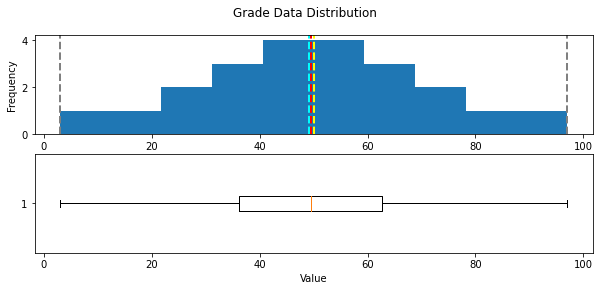

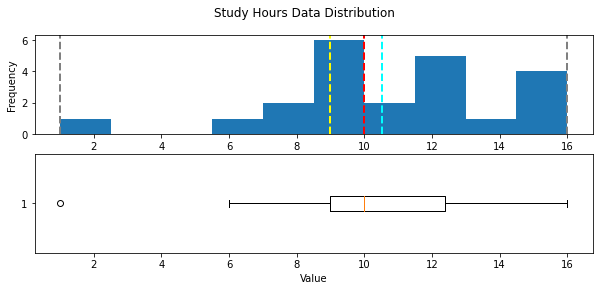

In [19]:
# Create a function that we can re-use
def show_distribution(var_data, title):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(f'{title} Statistics')
    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(title)

    # Show the figure
    fig.show()

# Get the variable to examine
col = df_students['Grade']
# Call the function
show_distribution(col, 'Grade Data Distribution')

col_two = df_students['StudyHours']
show_distribution(col_two, 'Study Hours Data Distribution')

## 2. Graphs of the Density of the Student's Grades and Study Hours Distributions as well as the Mean (cyan), Median (red) and Mode (yellow) values were created

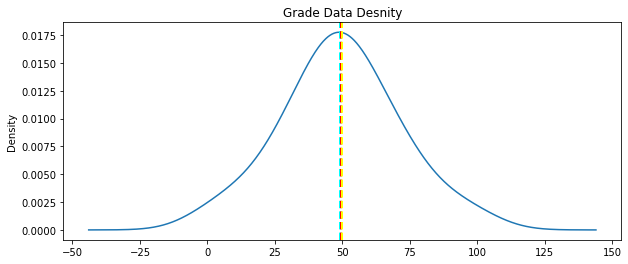

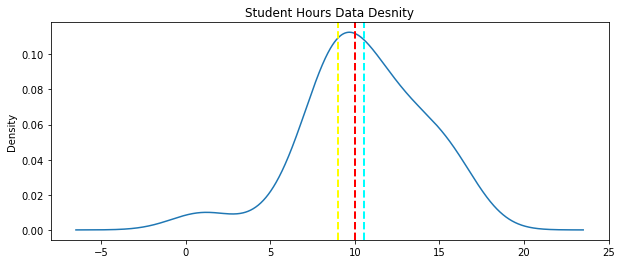

In [21]:
def show_density(var_data, title):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title(title)

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of Grade
show_density(col, 'Grade Data Desnity')
show_density(col_two, 'Student Hours Data Desnity')


## 3. The Range, Variance and Standard Deviation of Student's Grades and Study Hours were Calculated

In [22]:
for col_name in ['Grade','StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


Grade:
 - Range: 94.00
 - Variance: 472.54
 - Std.Dev: 21.74

StudyHours:
 - Range: 15.00
 - Variance: 12.16
 - Std.Dev: 3.49


## 4. Graphs of Nominal Distribution of Student's Grades and Study Hours were Created

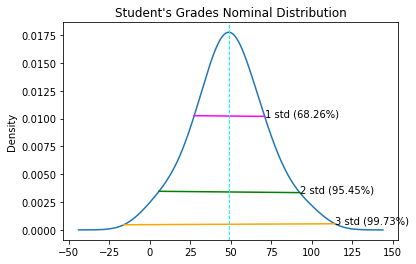

In [27]:
# Get the Grade column
col = df_students['Grade']

# get the density
density = stats.gaussian_kde(col)

# Plot the density
col.plot.density()

# Get the mean and standard deviation
s = col.std()
m = col.mean()

# Annotate 1 stdev
x1 = [m-s, m+s]
y1 = density(x1)
plt.plot(x1,y1, color='magenta')
plt.annotate('1 std (68.26%)', (x1[1],y1[1]))

# Annotate 2 stdevs
x2 = [m-(s*2), m+(s*2)]
y2 = density(x2)
plt.plot(x2,y2, color='green')
plt.annotate('2 std (95.45%)', (x2[1],y2[1]))

# Annotate 3 stdevs
x3 = [m-(s*3), m+(s*3)]
y3 = density(x3)
plt.plot(x3,y3, color='orange')
plt.annotate('3 std (99.73%)', (x3[1],y3[1]))

# Show the location of the mean
plt.axvline(col.mean(), color='cyan', linestyle='dashed', linewidth=1)

plt.title("Student's Grades Nominal Distribution")

plt.show()

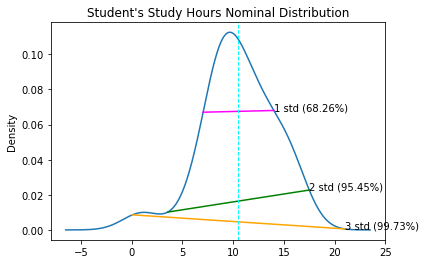

In [26]:
# Get the Grade column
col = df_students['StudyHours']

# get the density
density = stats.gaussian_kde(col)

# Plot the density
col.plot.density()

# Get the mean and standard deviation
s = col.std()
m = col.mean()

# Annotate 1 stdev
x1 = [m-s, m+s]
y1 = density(x1)
plt.plot(x1,y1, color='magenta')
plt.annotate('1 std (68.26%)', (x1[1],y1[1]))

# Annotate 2 stdevs
x2 = [m-(s*2), m+(s*2)]
y2 = density(x2)
plt.plot(x2,y2, color='green')
plt.annotate('2 std (95.45%)', (x2[1],y2[1]))

# Annotate 3 stdevs
x3 = [m-(s*3), m+(s*3)]
y3 = density(x3)
plt.plot(x3,y3, color='orange')
plt.annotate('3 std (99.73%)', (x3[1],y3[1]))

# Show the location of the mean
plt.axvline(col.mean(), color='cyan', linestyle='dashed', linewidth=1)

plt.title("Student's Study Hours Nominal Distribution")

plt.show()

## 5. Additional Descriptive Statistics were Perfromed

In [28]:
print(df_students.describe())

       StudyHours      Grade
count   22.000000  22.000000
mean    10.522727  49.181818
std      3.487144  21.737912
min      1.000000   3.000000
25%      9.000000  36.250000
50%     10.000000  49.500000
75%     12.375000  62.750000
max     16.000000  97.000000


## 6. At this point, the Outlier Study Hour Records were Removed as Identified from the Box and Whisper Plot

In [30]:
df_sample = df_students[df_students['StudyHours']>1]
print(df_sample)

         Name  StudyHours  Grade   Pass
3       Rosie       16.00   97.0   True
10  Francesca       15.50   82.0   True
9    Giovanni       14.50   74.0   True
14      Jenny       15.50   70.0   True
21      Aisha       12.00   64.0   True
20     Daniel       12.50   63.0   True
11      Rajab       13.75   62.0   True
6    Frederic       11.50   53.0  False
19       Skye       12.00   52.0  False
1       Joann       11.50   50.0  False
0         Dan       10.00   50.0  False
4       Ethan        9.25   49.0  False
18      Anila       10.00   48.0  False
2       Pedro        9.00   47.0  False
7      Jimmie        9.00   42.0  False
12    Naiyana        9.00   37.0  False
16     Helena        9.00   36.0  False
17      Ismat        6.00   35.0  False
15     Jakeem        8.00   27.0  False
8      Rhonda        8.50   26.0  False
13       Kian        8.00   15.0  False


## 6. A Boxplot of the Comparison of Number of Hours Student's Study versus if they Passed or Not was Created

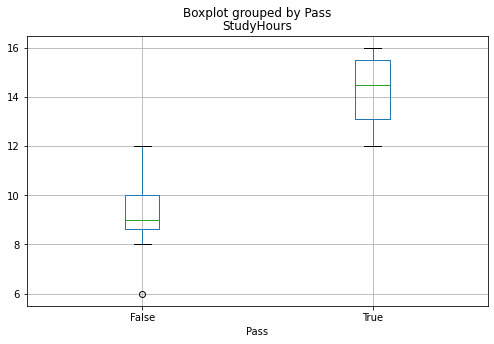

In [31]:
df_sample.boxplot(column='StudyHours', by='Pass', figsize=(8,5))

## 7. A Graph Containing the Comparison of Each Students Grades and Number of Hours Studied was Created

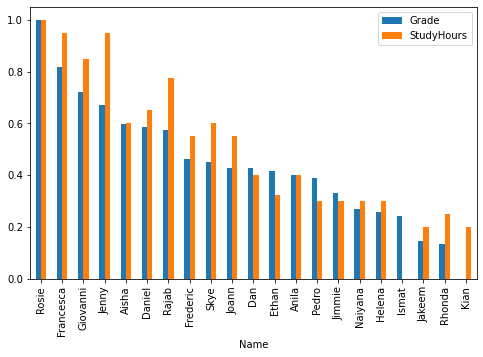

In [33]:
df_sample.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

## 8. A Graph Contaning a Comparison of Each Students Normalised Grades and Number of Hours Studied was Created

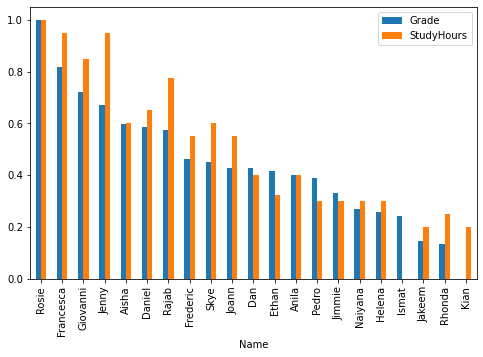

In [34]:
# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()

# Normalize the numeric columns
df_normalized[['Grade','StudyHours']] = scaler.fit_transform(df_normalized[['Grade','StudyHours']])

# Plot the normalized values
df_normalized.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

## 9. The correlation statistic between Student's Grades and Study Hours were Calculated

slope: 6.3134
y-intercept: -17.9164
so...
 f(x) = 6.3134x + -17.9164


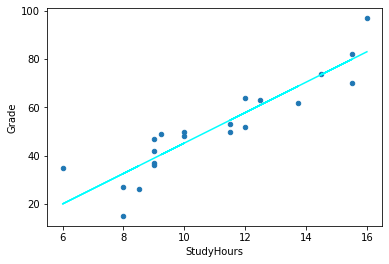

In [36]:
#
df_regression = df_sample[['Grade', 'StudyHours']].copy()

# Get the regression slope and intercept
m, b, r, p, se = stats.linregress(df_regression['StudyHours'], df_regression['Grade'])
print('slope: {:.4f}\ny-intercept: {:.4f}'.format(m,b))
print('so...\n f(x) = {:.4f}x + {:.4f}'.format(m,b))

# Use the function (mx + b) to calculate f(x) for each x (StudyHours) value
df_regression['fx'] = (m * df_regression['StudyHours']) + b

# Calculate the error between f(x) and the actual y (Grade) value
df_regression['error'] = df_regression['fx'] - df_regression['Grade']

# Create a scatter plot of Grade vs Salary
df_regression.plot.scatter(x='StudyHours', y='Grade')

# Plot the regression line
plt.plot(df_regression['StudyHours'],df_regression['fx'], color='cyan')

# Display the plot
plt.show()

## 10. The Regression Coefficients were Calculated

In [37]:
# Show the original x,y values, the f(x) value, and the error
df_regression[['StudyHours', 'Grade', 'fx', 'error']]

,StudyHours,Grade,fx,error
3,16.00,97.0,83.098400,-13.901600
10,15.50,82.0,79.941687,-2.058313
9,14.50,74.0,73.628262,-0.371738
14,15.50,70.0,79.941687,9.941687
21,12.00,64.0,57.844698,-6.155302
20,12.50,63.0,61.001410,-1.998590
11,13.75,62.0,68.893193,6.893193
6,11.50,53.0,54.687985,1.687985
19,12.00,52.0,57.844698,5.844698
1,11.50,50.0,54.687985,4.687985


## 11. The Regression Coefficients Can be Used for Predicting the Grade Based on the Number of Hours Studied

In [51]:
out = widgets.Output(layout={'border': '0.5px solid black'})

# Define a function based on our regression coefficients
def regression_prediction(button):
    grade = min(100, m * study_hours_input.value + b)
    with out:
            print(f'With {study_hours_input.value} study hours a studnet is predicted to get a grade of {round(grade,2)}')
    submit_button.description='Successful!'
    submit_button.icon="check"
    submit_button.button_style='success'
    time.sleep(3)
    # Reset the Button 
    submit_button.description='Predicte Grade'
    submit_button.icon="refresh"
    submit_button.button_style='primary'

study_time = 14

style = {'description_width': 'initial'}

study_hours_input = widgets.BoundedFloatText(
    value=0.0,
    min=0,
    max=100.0,
    step=0.5,
    description='Study Hours:',
    disabled=False,
    style=style
)

# Grade can't be less than 0 or more than 100
expected_grade = max(0,min(100,prediction))

#Print the estimated grade
print ('Studying for {} hours per week may result in a grade of {:.0f}'.format(study_time, expected_grade))

submit_button=widgets.Button(
    description="Predict Grade",
    disabled=False,
    button_style='primary', 
    tooltip="Click to predict the value of the grade",
    icon='refresh')

submit_button.on_click(regression_prediction)

form=widgets.HBox([study_hours_input, out])
final_form=widgets.VBox([form, submit_button])

display(final_form)

Studying for 14 hours per week may result in a grade of 70
